In [1]:
import tensorflow as tf
import pandas as pd

In [2]:


df=pd.read_csv('NF-UQ-NIDS-v2.csv',nrows=1000000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   IPV4_SRC_ADDR                1000000 non-null  object 
 1   L4_SRC_PORT                  1000000 non-null  int64  
 2   IPV4_DST_ADDR                1000000 non-null  object 
 3   L4_DST_PORT                  1000000 non-null  int64  
 4   PROTOCOL                     1000000 non-null  int64  
 5   L7_PROTO                     1000000 non-null  float64
 6   IN_BYTES                     1000000 non-null  int64  
 7   IN_PKTS                      1000000 non-null  int64  
 8   OUT_BYTES                    1000000 non-null  int64  
 9   OUT_PKTS                     1000000 non-null  int64  
 10  TCP_FLAGS                    1000000 non-null  int64  
 11  CLIENT_TCP_FLAGS             1000000 non-null  int64  
 12  SERVER_TCP_FLAGS             1000000 non-nu

In [3]:
import ipaddress
def ip2long(ip):
  """
  Convert an IP string to long
  """
  return int(ipaddress.ip_address(ip))


In [4]:

df['IPV4_DST_ADDR']= df['IPV4_DST_ADDR'].apply(ip2long)
df['IPV4_SRC_ADDR']= df['IPV4_SRC_ADDR'].apply(ip2long)


In [5]:
x_columns=df.columns.drop(['Label','Attack','Dataset'])

In [6]:
x=df[x_columns].values
x

array([[3.23226127e+09, 6.53890000e+04, 3.23226113e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.23226127e+09, 1.11540000e+04, 3.23226112e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.23223581e+09, 4.20620000e+04, 3.23223586e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.23226127e+09, 4.41130000e+04, 3.23226113e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.23223581e+09, 5.18460000e+04, 3.23223597e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.23226127e+09, 2.01320000e+04, 3.23226112e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [7]:
# # BoxPlot으로 확인
# plt.figure(figsize=(5,5))
# plt.hist([df['IPV4_SRC_ADDR']],100)
# plt.xticks([1],['IPV4_SRC_ADDR'])

In [8]:
df[(df['ICMP_TYPE'] != 0) &  (df['PROTOCOL'] !=  1)]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset
0,3232261268,65389,3232261127,80,6,7.0,420,3,0,0,...,0,35840,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
8,3232261267,33372,3232261125,80,6,7.0,280,2,40,1,...,0,35840,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
10,2948848415,56401,2887729173,3389,6,0.0,1969,9,1773,8,...,64000,23808,93,0,0,0,0.0,0,Benign,NF-CSE-CIC-IDS2018-v2
21,3232261268,13765,3232261123,80,6,7.0,280,2,0,0,...,0,35840,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
35,316391700,37700,2887730457,80,6,7.0,3904,27,6015,25,...,26847,3840,15,0,0,0,0.0,1,DoS,NF-CSE-CIC-IDS2018-v2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999937,3232235806,38262,3232235960,443,6,0.0,1992,17,9903,33,...,28960,45568,178,0,0,0,0.0,1,DDoS,NF-ToN-IoT-v2
999956,2887730436,50160,3231816705,443,6,0.0,3154,22,8478,25,...,6562,18432,72,0,0,0,0.0,0,Benign,NF-CSE-CIC-IDS2018-v2
999966,1000734724,54265,2511044102,30601,6,0.0,4862,84,82278,86,...,14480,11008,43,0,0,0,0.0,0,Benign,NF-UNSW-NB15-v2
999978,1000734729,1750,2511044101,22970,6,0.0,2542,40,20090,38,...,14480,6912,27,0,0,0,0.0,0,Benign,NF-UNSW-NB15-v2


In [9]:
x = df[x_columns]

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   IPV4_SRC_ADDR                1000000 non-null  int64  
 1   L4_SRC_PORT                  1000000 non-null  int64  
 2   IPV4_DST_ADDR                1000000 non-null  int64  
 3   L4_DST_PORT                  1000000 non-null  int64  
 4   PROTOCOL                     1000000 non-null  int64  
 5   L7_PROTO                     1000000 non-null  float64
 6   IN_BYTES                     1000000 non-null  int64  
 7   IN_PKTS                      1000000 non-null  int64  
 8   OUT_BYTES                    1000000 non-null  int64  
 9   OUT_PKTS                     1000000 non-null  int64  
 10  TCP_FLAGS                    1000000 non-null  int64  
 11  CLIENT_TCP_FLAGS             1000000 non-null  int64  
 12  SERVER_TCP_FLAGS             1000000 non-nu

In [11]:
# Convert to numpy - Classification
df['IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].astype('int64')
df['IPV4_DST_ADDR'] = df['IPV4_DST_ADDR'].astype('int64')
df['L4_SRC_PORT'] = df['L4_SRC_PORT'].astype('float64')
df['L4_DST_PORT'] = df['L4_DST_PORT'].astype('float64')
df['PROTOCOL'] = df['PROTOCOL'].astype('float64')
df['IN_BYTES'] = df['IN_BYTES'].astype('float64')
df['IN_PKTS'] = df['IN_PKTS'].astype('float64')
df['OUT_BYTES'] = df['OUT_BYTES'].astype('float64')
df['OUT_PKTS'] = df['OUT_PKTS'].astype('float64')
df['TCP_FLAGS'] = df['TCP_FLAGS'].astype('float64')
df['CLIENT_TCP_FLAGS'] = df['CLIENT_TCP_FLAGS'].astype('float64')
df['SERVER_TCP_FLAGS'] = df['SERVER_TCP_FLAGS'].astype('float64')
df['FLOW_DURATION_MILLISECONDS'] = df['FLOW_DURATION_MILLISECONDS'].astype('float64')
df['DURATION_IN'] = df['DURATION_IN'].astype('float64')
df['DURATION_OUT'] = df['DURATION_OUT'].astype('float64')
df['SRC_TO_DST_SECOND_BYTES'] = df['SRC_TO_DST_SECOND_BYTES'].astype('float64')
df['DST_TO_SRC_SECOND_BYTES'] = df['DST_TO_SRC_SECOND_BYTES'].astype('float64')

df['MIN_TTL'] = df['MIN_TTL'].astype('float64')
df['MAX_TTL'] = df['MAX_TTL'].astype('float64')
df['LONGEST_FLOW_PKT'] = df['LONGEST_FLOW_PKT'].astype('float64')
df['SHORTEST_FLOW_PKT'] = df['SHORTEST_FLOW_PKT'].astype('float64')
df['MIN_IP_PKT_LEN'] = df['MIN_IP_PKT_LEN'].astype('float64')
df['MAX_IP_PKT_LEN'] = df['MAX_IP_PKT_LEN'].astype('float64')
df['RETRANSMITTED_IN_BYTES'] = df['RETRANSMITTED_IN_BYTES'].astype('float64')
df['RETRANSMITTED_IN_PKTS'] = df['RETRANSMITTED_IN_PKTS'].astype('float64')
df['RETRANSMITTED_OUT_BYTES'] = df['RETRANSMITTED_OUT_BYTES'].astype('float64')
df['RETRANSMITTED_OUT_PKTS'] = df['RETRANSMITTED_OUT_PKTS'].astype('float64')
df['SRC_TO_DST_AVG_THROUGHPUT'] = df['SRC_TO_DST_AVG_THROUGHPUT'].astype('float64')
df['DST_TO_SRC_AVG_THROUGHPUT'] = df['DST_TO_SRC_AVG_THROUGHPUT'].astype('float64')
df['NUM_PKTS_UP_TO_128_BYTES'] = df['NUM_PKTS_UP_TO_128_BYTES'].astype('float64')
df['NUM_PKTS_128_TO_256_BYTES'] = df['NUM_PKTS_128_TO_256_BYTES'].astype('float64')
df['NUM_PKTS_256_TO_512_BYTES'] = df['NUM_PKTS_256_TO_512_BYTES'].astype('float64')
df['NUM_PKTS_512_TO_1024_BYTES'] = df['NUM_PKTS_512_TO_1024_BYTES'].astype('float64')
df['NUM_PKTS_1024_TO_1514_BYTES'] = df['NUM_PKTS_1024_TO_1514_BYTES'].astype('float64')
df['TCP_WIN_MAX_IN'] = df['TCP_WIN_MAX_IN'].astype('float64')
df['TCP_WIN_MAX_OUT'] = df['TCP_WIN_MAX_OUT'].astype('float64')
df['ICMP_TYPE'] = df['ICMP_TYPE'].astype('float64')
df['ICMP_IPV4_TYPE'] = df['ICMP_IPV4_TYPE'].astype('float64')
df['DNS_QUERY_ID'] = df['DNS_QUERY_ID'].astype('float64')
df['DNS_QUERY_TYPE'] = df['DNS_QUERY_TYPE'].astype('float64')
df['DNS_TTL_ANSWER'] = df['DNS_TTL_ANSWER'].astype('float64')

x_columns = df.columns.drop('Attack')
x_columns = x_columns.drop('Dataset')
x_columns = x_columns.drop('Label')

#x = df[x_columns].values
x = df[x_columns]

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   IPV4_SRC_ADDR                1000000 non-null  int64  
 1   L4_SRC_PORT                  1000000 non-null  float64
 2   IPV4_DST_ADDR                1000000 non-null  int64  
 3   L4_DST_PORT                  1000000 non-null  float64
 4   PROTOCOL                     1000000 non-null  float64
 5   L7_PROTO                     1000000 non-null  float64
 6   IN_BYTES                     1000000 non-null  float64
 7   IN_PKTS                      1000000 non-null  float64
 8   OUT_BYTES                    1000000 non-null  float64
 9   OUT_PKTS                     1000000 non-null  float64
 10  TCP_FLAGS                    1000000 non-null  float64
 11  CLIENT_TCP_FLAGS             1000000 non-null  float64
 12  SERVER_TCP_FLAGS             1000000 non-nu

In [13]:
dummies = pd.get_dummies(df['Attack']) # Classification
dummiesLabel = pd.get_dummies(df['Label']) # Classification
y_1_label=df['Label'].values
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values
y_label = dummiesLabel.values

In [14]:
Y = dummies.values

In [15]:
X=pd.get_dummies(x,columns=['TCP_FLAGS'])
X

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_FLAGS_198.0,TCP_FLAGS_208.0,TCP_FLAGS_210.0,TCP_FLAGS_211.0,TCP_FLAGS_214.0,TCP_FLAGS_215.0,TCP_FLAGS_218.0,TCP_FLAGS_219.0,TCP_FLAGS_222.0,TCP_FLAGS_223.0
0,3232261268,65389.0,3232261127,80.0,6.0,7.0,420.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3232261268,11154.0,3232261125,80.0,6.0,7.0,280.0,2.0,40.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3232235807,42062.0,3232235855,1041.0,6.0,0.0,44.0,1.0,40.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3232235810,46849.0,3232235855,9110.0,6.0,0.0,44.0,1.0,40.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,3232235806,50360.0,3232235928,1084.0,6.0,0.0,44.0,1.0,40.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,3232261268,39830.0,3232261125,80.0,6.0,7.0,280.0,2.0,40.0,1.0,...,0,0,0,0,0,0,0,0,0,0
999996,3232261268,14098.0,3232261123,80.0,6.0,7.0,280.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
999997,3232261267,44113.0,3232261127,80.0,6.0,7.0,280.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
999998,3232235806,51846.0,3232235970,80.0,6.0,7.0,268.0,5.0,240.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 81 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   IPV4_SRC_ADDR                1000000 non-null  int64  
 1   L4_SRC_PORT                  1000000 non-null  float64
 2   IPV4_DST_ADDR                1000000 non-null  int64  
 3   L4_DST_PORT                  1000000 non-null  float64
 4   PROTOCOL                     1000000 non-null  float64
 5   L7_PROTO                     1000000 non-null  float64
 6   IN_BYTES                     1000000 non-null  float64
 7   IN_PKTS                      1000000 non-null  float64
 8   OUT_BYTES                    1000000 non-null  float64
 9   OUT_PKTS                     1000000 non-null  float64
 10  CLIENT_TCP_FLAGS             1000000 non-null  float64
 11  SERVER_TCP_FLAGS             1000000 non-null  float64
 12  FLOW_DURATION_MILLISECONDS   1000000 non-nu

In [17]:
def max_8G(val):
    if (val > 1.0e+9): return 1.0e+9
    return val

cols =['DST_TO_SRC_SECOND_BYTES', 'SRC_TO_DST_SECOND_BYTES', 'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT']

X[cols] = X[cols].applymap(max_8G)

In [18]:
X

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_FLAGS_198.0,TCP_FLAGS_208.0,TCP_FLAGS_210.0,TCP_FLAGS_211.0,TCP_FLAGS_214.0,TCP_FLAGS_215.0,TCP_FLAGS_218.0,TCP_FLAGS_219.0,TCP_FLAGS_222.0,TCP_FLAGS_223.0
0,3232261268,65389.0,3232261127,80.0,6.0,7.0,420.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3232261268,11154.0,3232261125,80.0,6.0,7.0,280.0,2.0,40.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3232235807,42062.0,3232235855,1041.0,6.0,0.0,44.0,1.0,40.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3232235810,46849.0,3232235855,9110.0,6.0,0.0,44.0,1.0,40.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,3232235806,50360.0,3232235928,1084.0,6.0,0.0,44.0,1.0,40.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,3232261268,39830.0,3232261125,80.0,6.0,7.0,280.0,2.0,40.0,1.0,...,0,0,0,0,0,0,0,0,0,0
999996,3232261268,14098.0,3232261123,80.0,6.0,7.0,280.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
999997,3232261267,44113.0,3232261127,80.0,6.0,7.0,280.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
999998,3232235806,51846.0,3232235970,80.0,6.0,7.0,268.0,5.0,240.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# def max_8G(val):
#     if (val > 1.0e+9): return 1.0e+9
#     return val

# cols =['DST_TO_SRC_SECOND_BYTES', 'SRC_TO_DST_SECOND_BYTES', 'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT']

# X[cols] = x[cols].applymap(max_8G)

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 81 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   IPV4_SRC_ADDR                1000000 non-null  int64  
 1   L4_SRC_PORT                  1000000 non-null  float64
 2   IPV4_DST_ADDR                1000000 non-null  int64  
 3   L4_DST_PORT                  1000000 non-null  float64
 4   PROTOCOL                     1000000 non-null  float64
 5   L7_PROTO                     1000000 non-null  float64
 6   IN_BYTES                     1000000 non-null  float64
 7   IN_PKTS                      1000000 non-null  float64
 8   OUT_BYTES                    1000000 non-null  float64
 9   OUT_PKTS                     1000000 non-null  float64
 10  CLIENT_TCP_FLAGS             1000000 non-null  float64
 11  SERVER_TCP_FLAGS             1000000 non-null  float64
 12  FLOW_DURATION_MILLISECONDS   1000000 non-nu

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler=scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [22]:
# # 데이터 정규화
# from sklearn import preprocessing
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import GridSearchCV
# import numpy as np

# #scaler_train_minmax = preprocessing.MinMaxScaler()

# scaler_train = preprocessing.StandardScaler()
# #scaler_train = preprocessing.MinMaxScaler()
# scaler_train = scaler_train.fit(X)
# X = pd.DataFrame(scaler_train.transform(X),index=np.arange(0,1000000,1), columns = X.columns)
# #X = scaler_train.transform(X)


In [23]:
def max_3sigma(val):
    if (val < -3): return -3
    if (val > 3): return 3
    return val


In [24]:
X = X.applymap(max_3sigma)

In [25]:
X

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_FLAGS_198.0,TCP_FLAGS_208.0,TCP_FLAGS_210.0,TCP_FLAGS_211.0,TCP_FLAGS_214.0,TCP_FLAGS_215.0,TCP_FLAGS_218.0,TCP_FLAGS_219.0,TCP_FLAGS_222.0,TCP_FLAGS_223.0
0,0.383849,1.356899,0.375325,-0.306428,-0.749746,-0.586524,-0.007789,-0.011499,-0.011857,-0.024220,...,-0.001,-0.001,-0.008718,-0.029593,-0.03148,-0.0101,-0.007616,-0.180762,-0.148083,-0.154083
1,0.383849,-1.586408,0.375325,-0.306428,-0.749746,-0.586524,-0.009818,-0.013316,-0.011710,-0.019156,...,-0.001,-0.001,-0.008718,-0.029593,-0.03148,-0.0101,-0.007616,-0.180762,-0.148083,-0.154083
2,0.383813,0.090954,0.375270,-0.216677,-0.749746,-0.675294,-0.013238,-0.015134,-0.011710,-0.019156,...,-0.001,-0.001,-0.008718,-0.029593,-0.03148,-0.0101,-0.007616,-0.180762,-0.148083,-0.154083
3,0.383813,0.350742,0.375270,0.536918,-0.749746,-0.675294,-0.013238,-0.015134,-0.011710,-0.019156,...,-0.001,-0.001,-0.008718,-0.029593,-0.03148,-0.0101,-0.007616,-0.180762,-0.148083,-0.154083
4,0.383813,0.541283,0.375270,-0.212661,-0.749746,-0.675294,-0.013238,-0.015134,-0.011710,-0.019156,...,-0.001,-0.001,-0.008718,-0.029593,-0.03148,-0.0101,-0.007616,-0.180762,-0.148083,-0.154083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.383849,-0.030175,0.375325,-0.306428,-0.749746,-0.586524,-0.009818,-0.013316,-0.011710,-0.019156,...,-0.001,-0.001,-0.008718,-0.029593,-0.03148,-0.0101,-0.007616,-0.180762,-0.148083,-0.154083
999996,0.383849,-1.426639,0.375325,-0.306428,-0.749746,-0.586524,-0.009818,-0.013316,-0.011857,-0.024220,...,-0.001,-0.001,-0.008718,-0.029593,-0.03148,-0.0101,-0.007616,-0.180762,-0.148083,-0.154083
999997,0.383849,0.202261,0.375325,-0.306428,-0.749746,-0.586524,-0.009818,-0.013316,-0.011857,-0.024220,...,-0.001,-0.001,-0.008718,-0.029593,-0.03148,-0.0101,-0.007616,-0.180762,-0.148083,-0.154083
999998,0.383813,0.621927,0.375270,-0.306428,-0.749746,-0.586524,-0.009992,-0.007863,-0.010977,-0.003962,...,-0.001,-0.001,-0.008718,-0.029593,-0.03148,-0.0101,-0.007616,-0.180762,-0.148083,-0.154083


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle = True, random_state=64)
x_train_label, x_test_label, y_train_label, y_test_label = train_test_split(X, y_label, test_size=0.20, shuffle = True, random_state=64)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800000, 81)
(200000, 81)
(800000, 21)
(200000, 21)


In [28]:
y1 = tf.argmax(dummies, axis=1)
y1=y1.numpy()
y1.shape

2023-10-11 00:51:34.931076: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1000000,)

In [29]:
#for stacking
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X, y1, test_size=0.20, shuffle = True, random_state=64)
x_train_1_label, x_test_1_label, y_train_1_label, y_test_1_label = train_test_split(X, y_1_label, test_size=0.20, shuffle = True, random_state=64)


In [30]:
y_train_1_label.shape

(800000,)

In [31]:
print(x_train_1.shape)
print(x_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(800000, 81)
(200000, 81)
(800000,)
(200000,)


In [32]:
x=X

In [33]:
xa

NameError: name 'xa' is not defined

In [ ]:
#model1

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=x.shape[1], bias_initializer="zeros", activation='relu'),
    tf.keras.layers.Dense(128, input_dim=x.shape[1], bias_initializer="zeros", activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, input_dim=x.shape[1], bias_initializer="zeros", activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, input_dim=x.shape[1],  bias_initializer="zeros", activation='relu'),
    tf.keras.layers.Dense(y.shape[1],activation='softmax')
    ])

In [ ]:
model_1.summary()

In [ ]:
#model 1
import datetime
model_1.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

log_dir_1 = "logss/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

monitor_1 = [
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=8, verbose=1, mode='auto',restore_best_weights=True),
             tf.keras.callbacks.TensorBoard(log_dir=log_dir_1, histogram_freq=1)
            ]
history_1  = model_1.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor_1],verbose=2, batch_size=1024, epochs=100)

In [ ]:
y_test.shape

In [ ]:
#Saving the second model
model_1.save('model1.h5')

In [ ]:
# #첫번째 히든레이어 확인
# first_hidden= model_1.layers[0]
# print(first_hidden.name)
# weights, biases =first_hidden.get_weights()
# #10번째 편향값 확인
# print(biases[10])
# #10번째 가중치에서 범위확인
# a=weights[10]
# print(min(a),max(a))

# #출력레이어 확인
# output = model_1.layers[6]
# print(output.name)
# weights, biases =output.get_weights()
# #10번째 편향값 확인
# print(biases[10])
# #10번째 가중치에서 범위확인
# a1=weights[10]
# print(min(a1),max(a1))


In [ ]:
#Training  model 2  with different structure
model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(64, input_dim=x.shape[1],  activation='relu'),
      tf.keras.layers.Dense(128, input_dim=x.shape[1],  activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(256, input_dim=x.shape[1], activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, input_dim=x.shape[1], activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(y.shape[1],activation='softmax')
      ])

In [ ]:
model_2.summary()

In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping

model_2.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

log_dir_2 = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

monitor_2 = [
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=8, verbose=1, mode='auto',restore_best_weights=True),
             tf.keras.callbacks.TensorBoard(log_dir=log_dir_2, histogram_freq=1)
            ]
history_2  = model_2.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor_2],verbose=2, batch_size=512, epochs=100)


In [ ]:
#Saving the second model
model_2.save('model2.h5')

In [ ]:
#3 rd model for stack
model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(64, input_dim=x.shape[1],activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(128, input_dim=x.shape[1],activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(128, input_dim=x.shape[1],activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(256, input_dim=x.shape[1], activation='relu'),
      tf.keras.layers.Dense(y.shape[1],activation='softmax')
      ])

In [ ]:
model_3.summary()

In [ ]:

model_3.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

monitor_3 = [
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=16, verbose=1, mode='auto',restore_best_weights=True),
             tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
            ]
history_3  = model_3.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor_3],verbose=2, batch_size=512, epochs=100)

In [ ]:
#Saving the second model
model_3.save('model3.h5')

In [ ]:
#4 rd model for stack
model_4 = tf.keras.Sequential([
      tf.keras.layers.Dense(128, input_dim=x.shape[1],  activation='relu'),
      tf.keras.layers.Dense(64, input_dim=x.shape[1],  activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(32, input_dim=x.shape[1], activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, input_dim=x.shape[1], activation='relu'),
      tf.keras.layers.Dense(y.shape[1],activation='softmax')
      ])

In [ ]:
model_4.summary()

In [ ]:
model_4.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

log_dir_4 = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

monitor_4 = [
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=16, verbose=1, mode='auto',restore_best_weights=True),
             tf.keras.callbacks.TensorBoard(log_dir=log_dir_4, histogram_freq=1)
            ]
history_4  = model_4.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor_4],verbose=2, batch_size=512, epochs=100)

In [ ]:
model_4.save('model4.h5')

In [ ]:
# #4 rd model for stack
# model_55 = tf.keras.Sequential([
#       tf.keras.layers.Dense(64, input_dim=X.shape[1],  activation='relu'),
#       tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'),
#       tf.keras.layers.Dropout(0.3),
#       tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'),
#       tf.keras.layers.Dropout(0.3),
#       tf.keras.layers.Dense(64, input_dim=X.shape[1],  activation='relu'),
#       tf.keras.layers.Dense(y_label.shape[1],activation='softmax')
#       ])

In [ ]:
# model_55.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

# log_dir_55 = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# monitor_55 = [
#              tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=16, verbose=1, mode='auto',restore_best_weights=True),
#              tf.keras.callbacks.TensorBoard(log_dir=log_dir_55, histogram_freq=1)
#             ]
# history_55  = model_55.fit(x_train_label,y_train_label,validation_data=(x_test_label,y_test_label), callbacks=[monitor_55],verbose=2, batch_size=512, epochs=100)

In [ ]:
# model_55.save('model5.h5')

In [ ]:
# # make a prediction with a stacked model
# #neural
# def predict_model55(model, inputX):
# 	# prepare input data
# 	X = [inputX for _ in range(len(model.input))]
# 	# make prediction
# 	return model.predict(X, verbose=2)

In [ ]:
# # 모델 성능 - confusion matrix
# from sklearn.metrics import accuracy_score
# import numpy as np
# # make predictions and evaluate
# #neural
# yhat =  model_55.predict(x_test)
# yhat_val = tf.argmax(yhat, axis=1)
# acc = accuracy_score(y_test_1_label, yhat_val)
# print('Stacked Test Accuracy: %.4f' % acc)

In [34]:
# load models from file
# for both logistic and nueral
def load_all_models(n_models):
	all_models = list()

	for i in range(n_models):
		# define filename for this ensemble
		filename = 'model' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename,custom_objects=None)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

In [35]:
# define stacked model from multiple member input models
#neural

def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i + 1) + '_' + layer.name


	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(64, activation='relu',name="dense_a")(merge)
	output = Dense(21, activation='softmax',name="dense_b")(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	model.summary()
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [37]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [38]:
monitor_6= [
             tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
            ]

In [39]:
# fit a stacked model
#neural
def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	inputy_enc = to_categorical(inputy)
	# fit model
	history_6=model.fit(X, inputy_enc, epochs=32, verbose=2,callbacks=[monitor_6])

In [40]:
# make a prediction with a stacked model
#neural
def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X, verbose=2)

In [41]:
# load all models
#neural
from keras.models import load_model
n_members = 4
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded model1.h5
>loaded model2.h5
>loaded model3.h5
>loaded model4.h5
Loaded 4 models


In [42]:
# define ensemble model
import matplotlib.pyplot as plt
#from keras.utils import plot_model
#neural
#from keras.layers.merge import concatenate
from keras.layers import concatenate
from keras.layers import Dense
from keras.models import Model
from tensorflow.keras.utils import plot_model

stacked_model = define_stacked_model(members)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 dense_5_input (InputLayer)     [(None, 81)]         0           []                               
                                                                                                  
 dense_10_input (InputLayer)    [(None, 81)]         0           []                               
                                                                                                  
 dense_input (InputLayer)       [(None, 81)]         0           []                               
                                                                                                  
 ensemble_2_dense_5 (Dense)    

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800000, 81)
(200000, 81)
(800000, 21)
(200000, 21)


In [44]:
from keras.utils import to_categorical
inputy_enc = to_categorical(y_test_1)
print(y_test_1.shape)
print(inputy_enc.shape)
y_test_1

(200000,)
(200000, 21)


array([19, 19,  2, ...,  6,  5,  5])

In [45]:
inputy_enc

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
from keras.utils import to_categorical
# fit stacked model on test dataset
#neural
fit_stacked_model(stacked_model, x_test_1, y_test_1)

Epoch 1/32
6250/6250 - 6s - loss: 0.1378 - accuracy: 0.9689 - 6s/epoch - 935us/step
Epoch 2/32
6250/6250 - 6s - loss: 0.1013 - accuracy: 0.9723 - 6s/epoch - 997us/step
Epoch 3/32
6250/6250 - 5s - loss: 0.0988 - accuracy: 0.9724 - 5s/epoch - 876us/step
Epoch 4/32
6250/6250 - 6s - loss: 0.0970 - accuracy: 0.9724 - 6s/epoch - 907us/step
Epoch 5/32
6250/6250 - 6s - loss: 0.0959 - accuracy: 0.9724 - 6s/epoch - 916us/step
Epoch 6/32
6250/6250 - 6s - loss: 0.0946 - accuracy: 0.9725 - 6s/epoch - 925us/step
Epoch 7/32
6250/6250 - 6s - loss: 0.0945 - accuracy: 0.9723 - 6s/epoch - 929us/step
Epoch 8/32
6250/6250 - 6s - loss: 0.0943 - accuracy: 0.9725 - 6s/epoch - 922us/step
Epoch 9/32
6250/6250 - 6s - loss: 0.0936 - accuracy: 0.9725 - 6s/epoch - 910us/step
Epoch 10/32
6250/6250 - 6s - loss: 0.0936 - accuracy: 0.9724 - 6s/epoch - 901us/step
Epoch 11/32
6250/6250 - 6s - loss: 0.0933 - accuracy: 0.9726 - 6s/epoch - 905us/step
Epoch 12/32
6250/6250 - 6s - loss: 0.0930 - accuracy: 0.9725 - 6s/epoch - 

In [47]:

from sklearn.metrics import accuracy_score
import numpy as np
# make predictions and evaluate
#neural
yhat = predict_stacked_model(stacked_model, x_test_1)
yhat_val = tf.argmax(yhat, axis=1)
acc = accuracy_score(y_test_1, yhat_val)
print('Stacked Test Accuracy: %.4f' % acc)

6250/6250 - 4s - 4s/epoch - 702us/step
Stacked Test Accuracy: 0.9733


In [48]:
from sklearn.metrics import classification_report
target_names = dummies.columns.values 
print(classification_report(y_test_1, yhat_val,target_names=target_names))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00         6
      Backdoor       0.98      0.91      0.94        64
        Benign       0.97      0.98      0.98     66283
           Bot       1.00      1.00      1.00       367
   Brute Force       0.98      0.97      0.98       333
          DDoS       0.99      0.99      0.99     56897
           DoS       0.98      0.99      0.99     47395
      Exploits       0.85      0.74      0.79        87
       Fuzzers       0.49      0.71      0.58        49
       Generic       0.85      0.66      0.74        35
 Infilteration       0.99      0.23      0.38       298
Reconnaissance       0.85      0.74      0.79      6746
     Shellcode       0.71      0.83      0.77         6
         Theft       0.57      0.80      0.67         5
         Worms       0.00      0.00      0.00         1
     injection       0.88      0.74      0.81      1722
          mitm       1.00      0.10      0.18  

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
attack_labels = dummies.columns.values
attack_labels

array(['Analysis', 'Backdoor', 'Benign', 'Bot', 'Brute Force', 'DDoS',
       'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Infilteration',
       'Reconnaissance', 'Shellcode', 'Theft', 'Worms', 'injection',
       'mitm', 'password', 'ransomware', 'scanning', 'xss'], dtype=object)

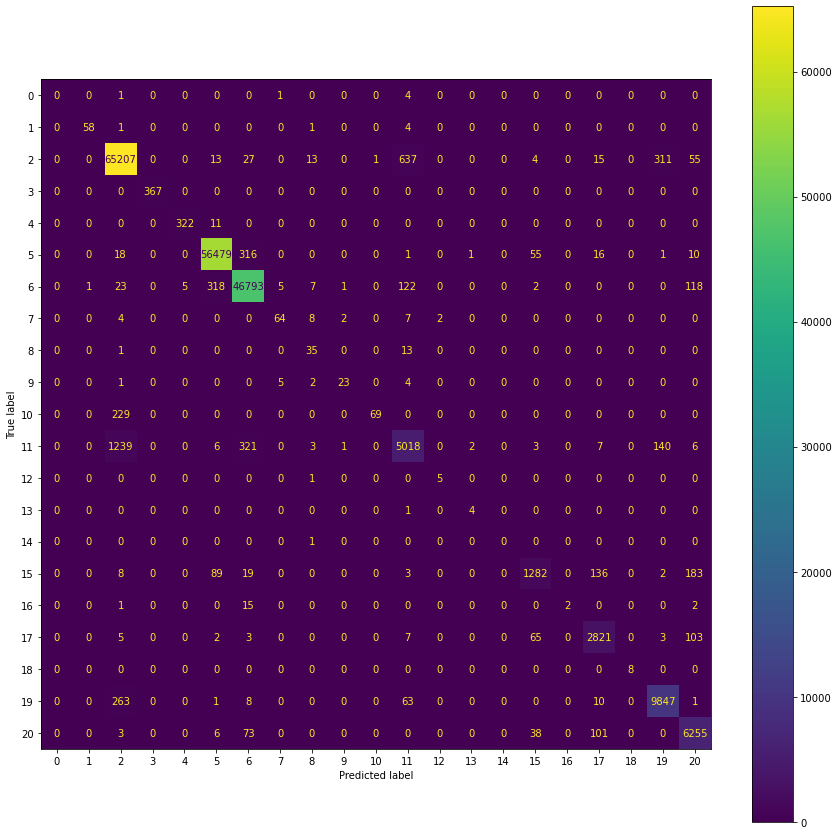

In [50]:
# 테스트 데이터에 대해 predict 수행
# 모델 성능 - confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_true=y_test_1, y_pred=yhat_val)
conf_mat

disp = ConfusionMatrixDisplay(conf_mat)
fig,ax=plt.subplots(figsize=(15,15))
#disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(ax=ax)